# validating updates to `_fsps_nmf`
I've made a number of changes to `_fsps_nmf`. This notebook is to compare these changes to an older version and validate the changes. 

Changes as of 12/23/2020: 
- SSPs used to be calculated at the center of lookback time bin. This ignores the significant contribution of the youngest ($t_{\rm age} \approx 0$) SSP, which contribute significantly. It's also inconsistent with how we calculate SFH and average SFRs. Now the SSPs are calculated at the bin edges of the lookback time grid. 

In [1]:
import numpy as np
from provabgs import models as Models
import matplotlib.pyplot as plt

In [2]:
fsps = Models.FSPS(name='nmf_bases')

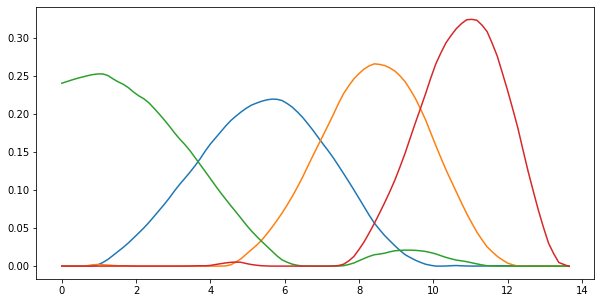

In [3]:
fig = plt.figure(figsize=(10, 5))
sub = fig.add_subplot(111)
for i in range(4): 
    theta = np.array([0., 0., 0., 0., 1e-4, 1e-4, 0, 0, 0, 0.01])
    theta[i] = 1.
    t, sfh = fsps.SFH(np.concatenate([[0.], theta[:-1]]), 0.01)
    sub.plot(t, sfh, c='C%i' % i)

3.214535958348964e-08
6.252832221385874e-09
0.018955303760903038


/Users/chahah/projects/provabgs/src/provabgs/models.py:403: RuntimeWarning: invalid value encountered in log10
  self._ssp.params['logzsol'] = np.log10(zh[i]/0.0190) # log(Z/Zsun)


8.636765182029572e-09


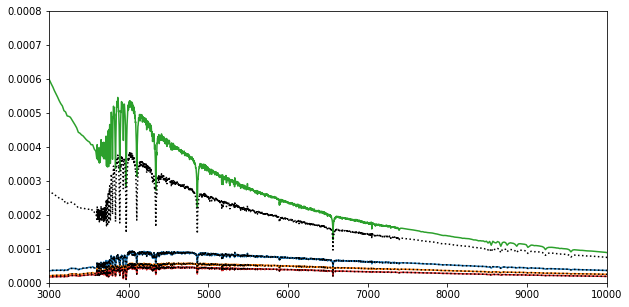

In [4]:
fig = plt.figure(figsize=(10, 5))
sub = fig.add_subplot(111)
for i in range(4): 
    theta = np.array([0., 0., 0., 0., 1e-4, 1e-4, 0, 0, 0, 0.01])
    theta[i] = 1.
    
    w, lum = fsps._fsps_nmf(theta)
    theta[-1] = fsps._tage_z_interp(0.01)
    w0, lum0 = fsps._fsps_nmf_v0(theta) 
    
    print(np.abs(lum - lum0).max())
    
    sub.plot(w, lum, c='C%i' % i)
    sub.plot(w0, lum0, c='k', ls=':')
    sub.set_xlim(3e3, 1e4)
    sub.set_ylim(0., 0.0008)

As expected, the 12/23/2020 updates significantly change the spectra for the case with recent SFH but leave the rest more or less unchanged. I believe this is what we want.